<a href="https://colab.research.google.com/github/VekhovIO/portfolio/blob/main/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будем решать задачу классификации клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора (оттоковый клиент) в ближайшее время или нет.

В ноутбуке будем использовать несколько моделей, в том числе SVM, поэтому установим библиотеку для быстрого обучения SVM.

In [ ]:
# убедимся, что версия python < 3.10
!python --version

Python 3.11.11


In [ ]:
%%capture
!python -m pip install --upgrade pip
!pip install --upgrade scikit-learn-intelex

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [ ]:
import sys
import os
import site
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

In [ ]:
RANDOM_STATE = 42

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
np.random.seed(RANDOM_STATE)

Сделаем первичную обработку данных:

1) Выбросим колонку State

2) Колонки International plan и Voice mail plan закодируем следующим образом: "Yes" заменим на 1, а "No" на 0.

3) Перевем целевую переменную (Churn) в числа: True в 1, а False в 0.

In [ ]:
df_new = df.drop('State', axis = 1)

df_new['Voice mail plan'] = df_new['Voice mail plan'].map({'Yes': 1, 'No': 0})
df_new['International plan'] = df_new['International plan'].map({'Yes': 1, 'No': 0})

df_new['Churn'] = df_new['Churn'].map({True: 1, False: 0})

In [ ]:
print(df_new['International plan'].sum())

323


In [ ]:
df_new.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
X = df_new.drop('Churn', axis = 1)
y = df_new['Churn']

In [ ]:
print(y.value_counts(normalize= True)*100)

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64


По кросс-валидации с тремя фолдами и метрикой ROC-AUC (scoring='roc_auc') обучим:

1) Логистическую регрессию

2) Метод опорных векторов (с kernel='linear')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model1 = LogisticRegression()
#model2 = SVC(kernel = 'linear', probability=True)

print(cross_val_score(model1, X, y, scoring = 'roc_auc', cv = 3, verbose = 0).mean())
#print(cross_val_score(model2, X, y, scoring = 'roc_auc', cv = 3,  verbose = 1).mean())


0.7300991609458428


/usr/local/lib/python3.11/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Теперь обучим решающее дерево с параметрами по умолчанию по кросс-валидации с тремя фолдами и той же метрикой.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = RANDOM_STATE)

cross_val_score(model, X, y, scoring = 'roc_auc', cv = 3, verbose = 1).mean()

np.float64(0.8361261850277869)

Наша цель - максимально улучшить модели. Для этого:

1) у линейных моделей подберем гиперпараметр С (переберем 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у решающего дерева подберем max_depth (переберем глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

Для подбора параметров используем GridSearchCV с тремя фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C' : np.linspace(0.1, 10.01, 20)}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

/usr/local/lib/python3.11/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

(np.float64(0.7077953439949164),
 LogisticRegression(C=np.float64(5.837368421052631)))

In [ ]:
from sklearn.metrics import roc_auc_score

lr = gs.best_estimator_

pred_lr = lr.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_lr))

0.7792510873024292


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
model = DecisionTreeClassifier(random_state = RANDOM_STATE)
params = {'max_depth': range(1, 10, 1), 'criterion': ['gini', 'enthropy']}

grid = GridSearchCV(model, params, scoring = 'roc_auc', cv = 3)

grid.fit(Xtrain, ytrain)
print(grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'max_depth': 6} 0.8644263148363854


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

In [ ]:
tr = grid.best_estimator_
ypred = tr.predict_proba(Xtest)[:,1]

print(roc_auc_score(ytest, ypred))

0.8555540142471297


Нарисуем roc-кривую для наилучшей модели.

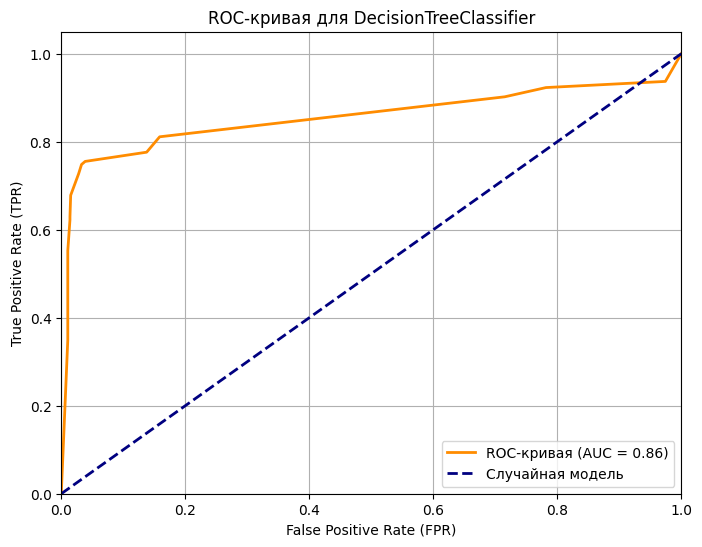

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = roc_auc_score(ytest, ypred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
importance = tr.feature_importances_
print(importance)

[0.00451407 0.         0.10745637 0.         0.07205106 0.02341654
 0.0088631  0.25588212 0.07539719 0.00361126 0.06974143 0.0063197
 0.00928926 0.01782532 0.         0.11912546 0.07777674 0.14873038]


                   Feature  Importance
7         Total day charge    0.255882
17  Customer service calls    0.148730
15        Total intl calls    0.119125
2       International plan    0.107456
16       Total intl charge    0.077777
8        Total eve minutes    0.075397
4    Number vmail messages    0.072051
10        Total eve charge    0.069741
5        Total day minutes    0.023417
13      Total night charge    0.017825
12       Total night calls    0.009289
6          Total day calls    0.008863
11     Total night minutes    0.006320
0           Account length    0.004514
9          Total eve calls    0.003611
1                Area code    0.000000
3          Voice mail plan    0.000000
14      Total intl minutes    0.000000


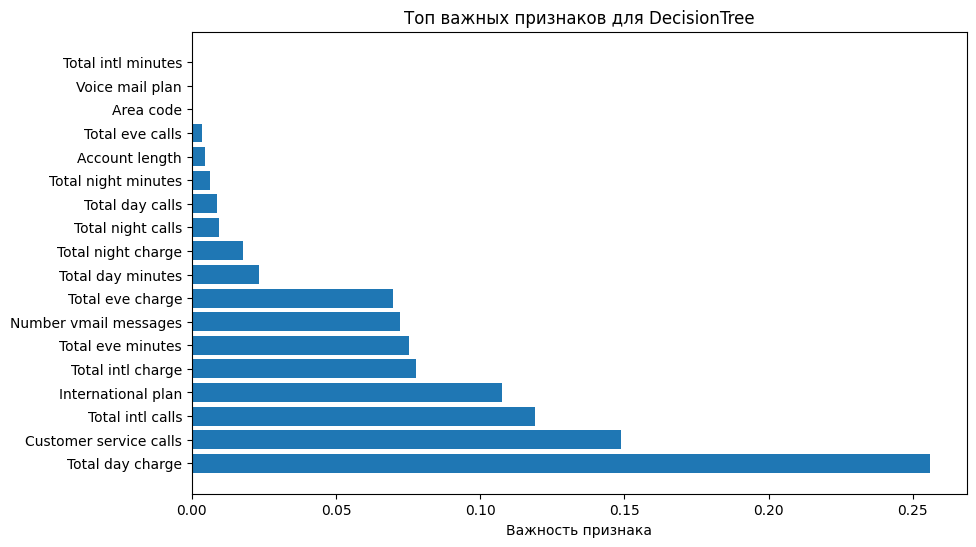

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': Xtrain.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print(feature_importance)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Важность признака')
plt.title('Топ важных признаков для DecisionTree')
plt.show()